### 1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from tqdm import tqdm

To solve my integral with Monte Carlo integration I have to write the integrand as a product of $f(x)$ and $p(x)$ with $\int p(x)=1$.

In this case $p(x)$ is a half-gaussian with $\mu = 0$:
$$p(x) = \frac{2}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right)$$

So f(x) becomes:
$$f(x) = \sigma\sqrt\frac{\pi}{2} x^{3} $$


In [20]:
#Defining f(x)
def f(x, sigma):
        return ((np.pi/2)**0.5) * sigma * x**3

#Computing the integral with Monte Carlo integration
def integral(n, mu, sigma):
    distG = scipy.stats.halfnorm(mu, sigma)  #Defining the half-gaussian distribution
    xi = distG.rvs(n)  #Sampling n values from the half-gaussian distribution
    return np.mean(f(xi, sigma))

#'Fit' of the results ditribution
def fit (results):
    x = np.linspace(min(results), max(results), 1000)
    mean = np.mean(results)
    std = np.std(results, ddof=1)  #ddof=1 means that we are using the Bessel's correction and so computing the sample standard deviation
    gauss = scipy.stats.norm(mean, std)
    return x, gauss.pdf(x)

## Changing N

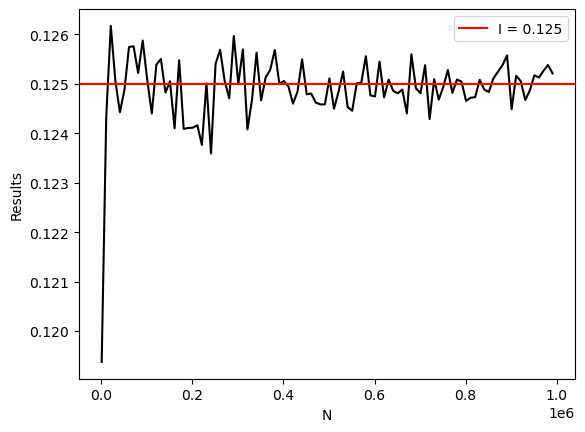

In [21]:
N = np.arange(1000, 1000001, 10000)
mu = 0
sigma = 0.5
results = np.array([integral(n, mu, sigma) for n in N])  #Computing the results of the integrals for different N

#Plotting the results
plt.plot(N, results, color = 'k')
plt.axhline(2*(sigma**4), color = 'red', label='I = %0.3f' %(2*(sigma**4)))
plt.xlabel('N')
plt.ylabel('Results')
plt.legend()
plt.show()

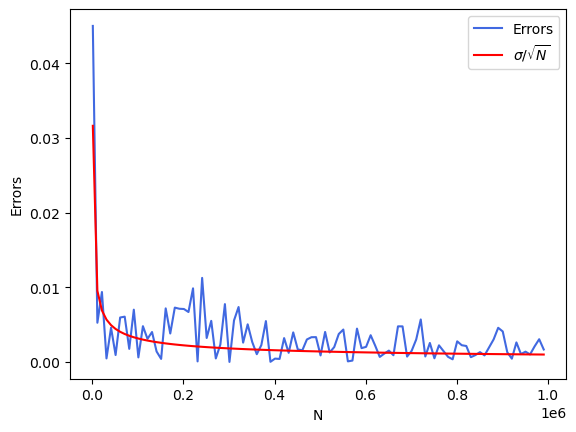

In [23]:
#Plotting the errors with respect to the expected result
plt.plot(N, np.abs(results-2*(sigma**4))/(2*(sigma**4)), color = 'royalblue', label = 'Errors')
plt.plot(N, N**-0.5, color = 'red', label = r'$\sigma/\sqrt{N}$')
plt.xlabel('N')
plt.ylabel('Errors')
plt.legend()
plt.show()

Since doing a Monte Carlo integration is the same as computing the sample mean, we have that the error scales as $\frac{\sigma}{\sqrt N}$.

## Same N

In [9]:
#Computing the integral for a given N, but repeating the computation many times
N_1 = 10
N_2 = 10**5
rep = 10**3
results_1 = np.array([integral(N_1, mu, sigma) for i in tqdm(range(rep))])
results_2 = np.array([integral(N_2, mu, sigma) for i in tqdm(range(rep))])

100%|██████████| 1000/1000 [00:06<00:00, 146.62it/s]


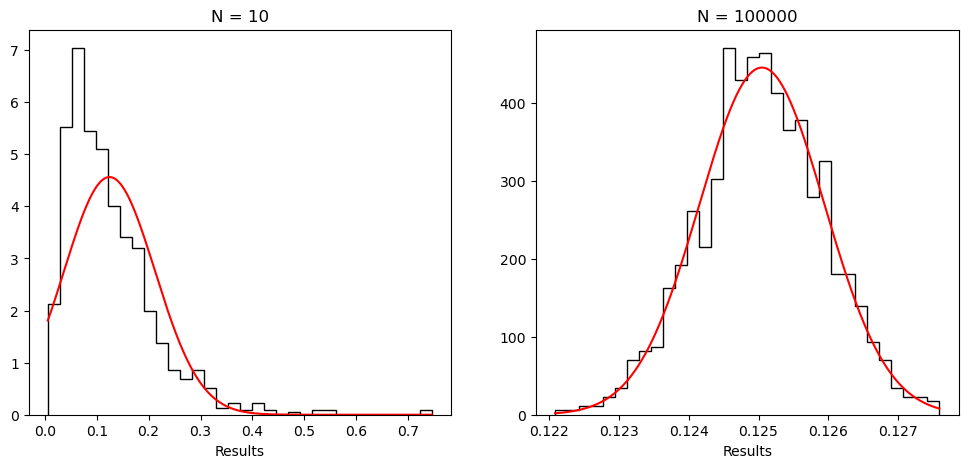

In [24]:
#Plotting the results and 'fitting' them with a gaussian distribution using the sample mean and sample standard deviation
fit_1 = fit(results_1)
fit_2 = fit(results_2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(results_1, bins = int(np.round(rep**0.5)), density=True, color ='black', histtype = 'step')
ax1.plot(fit_1[0], fit_1[1], color ='red')
ax1.set_title('N = %i' %(N_1))
ax1.set_xlabel('Results')

ax2.hist(results_2, bins = int(np.round(rep**0.5)), density=True, color ='black', histtype = 'step')
ax2.plot(fit_2[0], fit_2[1], color ='red')
ax2.set_title('N = %i' %(N_2))
ax2.set_xlabel('Results')

plt.show()

As we expect from the Central Limit Theoreme, when N increseas the distribution tends to a Gaussian.